In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
#Data Processing:
#a) Import the data: shape should be (30000,24)
#b) Remove any rows that have missing data.
#c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable. 

df = pd.read_csv(r'C:\Users\u353822\Documents\GitHub\University-of-Chicago1\University of Chicago\Machine Learning\HW 4\data.csv')
df.shape
df = df.dropna()
X = df.drop(['default payment next month'],axis=1)
y = df['default payment next month']

In [3]:
#d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [4]:
#2) Random Forest Classifier - Base Model:
#a Use the RandomForestClassifier in sklearn. 
#Fit your model on the training data & make sure to add a random_state 
clf = RandomForestClassifier(random_state=3)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [5]:
#2) Random Forest Classifier - Base Model:
#b Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred = clf.predict(X_test)
print(np.unique(y_pred))
print(np.unique(clf.predict_proba(X_test)))

[0 1]
[0.         0.025      0.03333333 0.1        0.2        0.25
 0.27714286 0.3        0.30833333 0.325      0.36       0.36666667
 0.4        0.43333333 0.45       0.46       0.49285714 0.5
 0.50714286 0.54       0.55       0.56666667 0.6        0.63333333
 0.64       0.675      0.69166667 0.7        0.72285714 0.75
 0.8        0.9        0.96666667 0.975      1.        ]


In [6]:
#c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[6618  422]
 [1328  632]]
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      7040
          1       0.60      0.32      0.42      1960

avg / total       0.78      0.81      0.78      9000



In [7]:
#d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.
y_pred = clf.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.6312528988868273


e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [8]:
#e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?
y_pred_train = clf.predict(X_train)
print(np.unique(y_pred_train))
print(np.unique(clf.predict_proba(X_train)))

[0 1]
[0.         0.03333333 0.05       0.06       0.1        0.125
 0.13333333 0.15       0.2        0.25       0.25714286 0.26666667
 0.3        0.30833333 0.33333333 0.34380952 0.35       0.375
 0.4        0.43333333 0.46       0.46666667 0.48166667 0.5
 0.51833333 0.53333333 0.54       0.56666667 0.6        0.625
 0.65       0.65619048 0.66666667 0.69166667 0.7        0.73333333
 0.74285714 0.75       0.8        0.85       0.86666667 0.875
 0.9        0.94       0.95       0.96666667 1.        ]


In [18]:
#e) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))


[[15917   407]
 [ 2532  2144]]
             precision    recall  f1-score   support

          0       0.86      0.98      0.92     16324
          1       0.84      0.46      0.59      4676

avg / total       0.86      0.86      0.84     21000



In [20]:
#d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.
print(roc_auc_score(y_train,y_pred_train))

0.7167894668883257


The model is slightly overfitted as we are returnced an ROC of .72 for our 
training data while our test data returned an ROC of .63. 

In [11]:
#Part 3 
#a) USe the RandomForestClassifier along with GridSearchCV tool.
#create a dictionary of parameters 
param_grid = {'max_depth':[6, 8,10,12],
'max_features':[2,4,'sqrt'],
'random_state':[0],
'n_estimators':[50,100,500]}

# create Random Forest model 
rf_obj=RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  7.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [6, 8, 10, 12], 'max_features': [2, 4, 'sqrt'], 'random_state': [0], 'n_estimators': [50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [12]:
#Part 3
#b) Identify the best performing model:
rf_Grid.best_params_
rf_Grid.best_estimator_
optimised_random_forest = rf_Grid.best_estimator_

In [13]:
#Part 3
#c) Use the best estimator model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred=optimised_random_forest.predict(X_test)
optimised_random_forest.predict(X_test)
optimised_random_forest.predict_proba(X_test)


array([[0.83839811, 0.16160189],
       [0.91035397, 0.08964603],
       [0.88188644, 0.11811356],
       ...,
       [0.88431926, 0.11568074],
       [0.91200366, 0.08799634],
       [0.91899288, 0.08100712]])

In [14]:
#Part 3
#d)  Calculate the confusion matrix and classification report (both are in sklearn.metrics). 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6690  350]
 [1265  695]]
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7040
          1       0.67      0.35      0.46      1960

avg / total       0.80      0.82      0.80      9000



In [15]:
#Part 3
#e) Calculate the roac_auc_score
print(roc_auc_score(y_test,y_pred))

0.6524379638218925


In [16]:
#Part 3
#f)
y_pred_train = optimised_random_forest.predict(X_train)
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(roc_auc_score(y_train,y_pred_train))

[[15917   407]
 [ 2532  2144]]
             precision    recall  f1-score   support

          0       0.86      0.98      0.92     16324
          1       0.84      0.46      0.59      4676

avg / total       0.86      0.86      0.84     21000

0.7167894668883257


This model is slightly better as there is a smaller difference returned between our test and training data, but the model is still slightly overfitted as we are returnced an ROC of .72 for our 
training data while our test data returned an ROC of .65. 

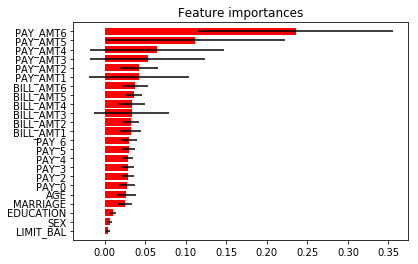

In [17]:
#Part 4 Create a feature importance plot for your best performing model.
importances = optimised_random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in optimised_random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), list(df.columns.values))
plt.ylim([-1, X.shape[1]])
plt.show()

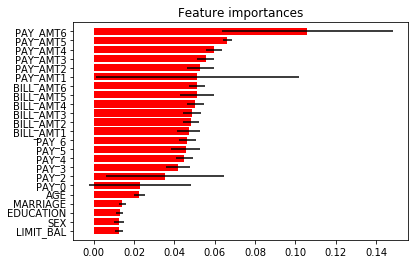

In [22]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), list(df.columns.values))
plt.ylim([-1, X.shape[1]])
plt.show()